In [1]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
raiz = "C:\\..."
df_2003 = pd.read_csv(raiz + "\df_dirigido_2003.csv", encoding="latin-1")
df_2004 = pd.read_csv(raiz + "\df_dirigido_2004.csv", encoding="latin-1")
df_2005 = pd.read_csv(raiz + "\df_dirigido_2005.csv", encoding="latin-1")
df_2006 = pd.read_csv(raiz + "\df_dirigido_2006.csv", encoding="latin-1")
df_2007 = pd.read_csv(raiz + "\df_dirigido_2007.csv", encoding="latin-1")
df_2008 = pd.read_csv(raiz + "\df_dirigido_2008.csv", encoding="latin-1")
df_2009 = pd.read_csv(raiz + "\df_dirigido_2009.csv", encoding="latin-1")
df_2010 = pd.read_csv(raiz + "\df_dirigido_2010.csv", encoding="latin-1")
df_2011 = pd.read_csv(raiz + "\df_dirigido_2011.csv", encoding="latin-1")
df_2012 = pd.read_csv(raiz + "\df_dirigido_2012.csv", encoding="latin-1")
df_2013 = pd.read_csv(raiz + "\df_dirigido_2013.csv", encoding="latin-1")

In [3]:
df_list = [df_2003, df_2004, df_2005, df_2006, df_2007, df_2008, df_2009, df_2010, df_2011, df_2012, df_2013]

In [4]:
final_value = np.zeros(57600)

In [5]:
for i in df_list:
    array = np.array(i["Value"])
    print(array)
    final_value = final_value + array

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]


In [6]:
final_value = final_value/11

In [7]:
df_promedio = df_2003.copy()
df_promedio["Value"] = final_value

In [8]:
final_value.sum()

2869563.2696363642

In [9]:
df_promedio["Value"].sum()

2869563.2696363567

In [10]:
cols = ['Reporting country', 'Partner country', 'Value']

In [11]:
def metrics_from_graph(df, rango):
    df_i = df.loc[df["Value"]>rango].copy()
    graph = nx.from_pandas_dataframe(df_i[cols], source="Reporting country", target="Partner country",create_using=nx.DiGraph())
    
    # Paises
    countries = list(dict(graph.out_degree()).keys())
    # out_degree 
    out_degree = list(dict(graph.out_degree()).values())

    # in_degree
    in_degree = list(dict(graph.in_degree()).values())
    
    # Betweenness
    betweenness = list(nx.betweenness_centrality(graph).values())
    
    # Closeness
    closeness = list(nx.closeness_centrality(graph).values())
        
    results = pd.DataFrame({"country" : countries,"out_degree" : out_degree, "in_degree" : in_degree, "betweenness": betweenness, "closeness" : closeness})    
    return(results)

In [12]:
df_resumen = metrics_from_graph(df_promedio,90)

In [13]:
df_resumen.head()

,betweenness,closeness,country,in_degree,out_degree
0,0.000000,0.376615,Algeria,4,1
1,0.182527,0.582042,United States,63,84
2,0.000000,0.000000,Andorra,0,1
3,0.032399,0.481110,Spain,35,48
4,0.000008,0.376615,Angola,5,4


In [14]:
reporting = df_promedio.groupby("Reporting country").sum().sort_values("Value", ascending = False)

In [15]:
reporting["country"] = reporting.index

In [16]:
reporting.head()

,Unnamed: 0,Value,country
Reporting country,,,
United States,13103880,426639.286091,United States
Luxembourg,7228680,308642.260091,Luxembourg
United Kingdom,13046280,250393.535545,United Kingdom
Netherlands,8726280,246135.440727,Netherlands
Germany,4521480,191731.898727,Germany


In [17]:
4940158776617.16 <18624475000000

True

In [18]:
partner = df_promedio.groupby("Partner country").sum().sort_values("Value", ascending = False)

In [19]:
partner["country"] = partner.index

In [20]:
gdp = pd.read_csv(raiz + "gdp.csv", encoding="latin-1", sep=",")
gdp.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,Unnamed: 62
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.026425e+10,2.061610e+10,1.921556e+10,1.946902e+10,NaN,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.029622e+11,9.533511e+10,NaN,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.277628e+10,1.322824e+10,1.133526e+10,1.186387e+10,NaN,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.660531e+09,3.355695e+09,3.442063e+09,3.164615e+09,3.281585e+09,3.350736e+09,2.811489e+09,2.858518e+09,NaN,NaN


In [21]:
avg_gdp = pd.DataFrame({"country" : gdp["Country Name"], "gdp" : list(np.nanmean(gdp.iloc[:,50:],axis=1))})

C:\Users\Leonardo.Cordoba\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [22]:
gdp.columns[50]

'2006'

In [23]:
avg_gdp.sort_values("gdp",ascending = False).head(20)

,country,gdp
257,World,6.851118e+13
93,High income,4.643755e+13
179,OECD members,4.570557e+13
196,Post-demographic dividend,4.342745e+13
101,IDA & IBRD total,2.275343e+13
138,Low & middle income,2.207934e+13
154,Middle income,2.176167e+13
63,Europe & Central Asia,2.155295e+13
100,IBRD only,2.121083e+13
61,East Asia & Pacific,1.789838e+13


In [24]:
df_final = pd.merge(df_resumen, reporting[["country","Value"]], how = "left")

In [25]:
df_final.columns = ['betweenness', 'closeness', 'country', 'in_degree', 'out_degree',
       'avg_emitted']

In [26]:
df_final = pd.merge(df_final, partner[["country","Value"]], how = "left")

In [27]:
population = pd.read_csv(raiz + "/data.csv", encoding="latin-1")

In [28]:
population.columns = ["country","population","rank"]

In [29]:
df_final = pd.merge(df_final, population[["country","population"]], how = "left")

In [30]:
df_final.columns = ['betweenness', 'closeness', 'country', 'in_degree', 'out_degree',
       'avg_emitted', 'avg_received','population']

In [31]:
df_final = pd.merge(df_final, avg_gdp, how = "left")

In [32]:
df_final = df_final.dropna()

In [33]:
df_final = df_final[['country','betweenness', 'closeness', 'in_degree', 'out_degree',
       'avg_emitted', 'avg_received', 'gdp','population']]

In [34]:
df_final["porc_emitted_gpd"] = df_final["avg_emitted"]/df_final["gdp"]*10000

In [35]:
df_final = df_final[df_final['gdp']!=0]

In [36]:
df_final["gdp_per_capita"] = df_final["gdp"]/df_final["population"]

In [37]:
from sklearn import preprocessing

In [38]:
df_final.loc[pd.isnull(df_final['gdp_per_capita']).values,'gdp_per_capita']

Series([], Name: gdp_per_capita, dtype: float64)

In [39]:
scaler = preprocessing.StandardScaler().fit(df_final[['betweenness', 'closeness', 'in_degree', 'out_degree',
       'avg_emitted', 'avg_received', 'gdp','population','porc_emitted_gpd','gdp_per_capita']])

In [40]:
std_array = scaler.transform(df_final[['betweenness', 'closeness', 'in_degree', 'out_degree',
       'avg_emitted', 'avg_received', 'gdp','population','porc_emitted_gpd','gdp_per_capita']])

In [41]:
std_df = pd.DataFrame(std_array,columns = ['betweenness', 'closeness', 'in_degree', 'out_degree',
       'avg_emitted', 'avg_received', 'gdp','population','porc_emitted_gpd','gdp_per_capita'])

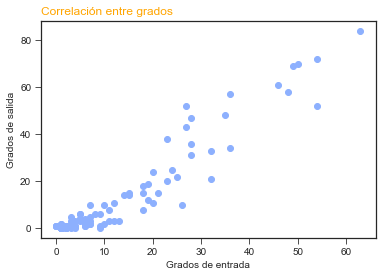

In [95]:
sns.set_palette("coolwarm", n_colors=3)
sns.set_style("ticks")
plt.scatter(df_final.in_degree,df_final.out_degree)
plt.xlabel("Grados de entrada")
plt.ylabel("Grados de salida")
plt.title("Correlación entre grados", loc='left', fontsize=12, fontweight=0, color='orange')
path = "C:\\Users\\Leonardo.Cordoba\\Downloads\\trabajo_integrador-20180320T180355Z-001\\trabajo_integrador\\grafos\\resultados\\graficos\\analisis_grafo\\corr_grados.png"
plt.savefig(path)
# el min valor abs es la posicion 36
#df_final.loc[36,]

In [105]:
dif = df_final.in_degree - df_final.out_degree
df_final.loc[np.abs(dif).sort_values(ascending = False).index,"country"]
indice = np.abs(dif).sort_values(ascending = False).index
pd.DataFrame({"diferencia" : dif[indice], "pais" : df_final.loc[indice,"country"]}).head(15)

,diferencia,pais
36,-25,Switzerland
1,-21,United States
25,-21,Italy
37,-20,United Kingdom
6,-20,France
26,-19,Japan
20,-18,Germany
52,16,Turkey
35,-16,Sweden
38,-15,Austria


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_result = pca.fit(std_array).transform(std_array)

In [113]:
pca.explained_variance_ratio_

array([ 0.56783901,  0.15620329])

In [47]:
print(std_df.columns)
pca.components_[0]

Index(['betweenness', 'closeness', 'in_degree', 'out_degree', 'avg_emitted',
       'avg_received', 'gdp', 'population', 'porc_emitted_gpd',
       'gdp_per_capita'],
      dtype='object')


array([ 0.37816824,  0.28838091,  0.39518733,  0.39555238,  0.39999261,
        0.39305894,  0.29288713,  0.0549037 ,  0.10479295,  0.21661544])

In [48]:
print(std_df.columns)
pca.components_[1]

Index(['betweenness', 'closeness', 'in_degree', 'out_degree', 'avg_emitted',
       'avg_received', 'gdp', 'population', 'porc_emitted_gpd',
       'gdp_per_capita'],
      dtype='object')


array([ 0.12660643,  0.00097589, -0.03640847, -0.05917394, -0.01446133,
       -0.03176733,  0.44418485,  0.56081496, -0.50089138, -0.46391665])

In [49]:
pca.explained_variance_ratio_

array([ 0.56783901,  0.15620329])

In [50]:
X = std_array

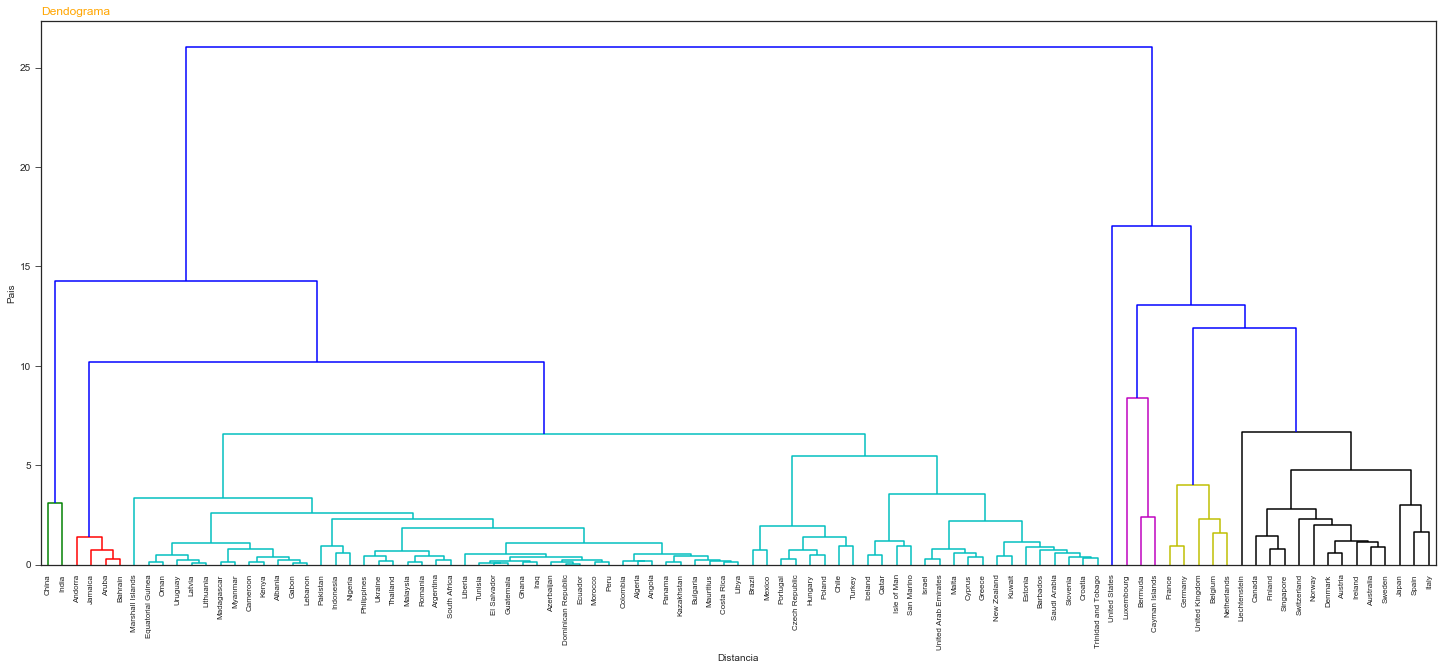

In [111]:
## Prueba con clustering jerarquico
import seaborn as sns
sns.set_style("ticks")
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
Z = linkage(X, 'ward')
# calculate full dendrogram
plt.figure(figsize=(25, 10))

plt.axes()
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = df_final["country"].values,
    color_threshold = 9
)
sns.set_palette("coolwarm")
sns.set_style("ticks")
plt.xlabel("Distancia")
plt.ylabel("Pais")
plt.title("Dendograma", loc='left', fontsize=12, fontweight=0, color='orange')

path = "C:\\Users\\Leonardo.Cordoba\\Downloads\\trabajo_integrador-20180320T180355Z-001\\trabajo_integrador\\grafos\\resultados\\graficos\\cluster\\dendograma.png"
plt.savefig(path)
#

In [52]:
assignments = fcluster(linkage(X, method='ward'),9,'distance')

In [68]:
pd.DataFrame({"country":df_final["country"].values,"assignment":assignments}).sort_values("assignment")

,assignment,country
21,1,India
18,1,China
49,2,Bahrain
2,2,Andorra
82,2,Jamaica
12,2,Aruba
69,3,Lithuania
68,3,Latvia
67,3,Equatorial Guinea
66,3,Qatar


In [53]:
pca_result[:,0].shape

(97,)

In [54]:
pc_df = pd.DataFrame({"pc1":pca_result[:,0],"pc2":pca_result[:,1], "cluster":assignments})

In [55]:
%matplotlib inline

In [83]:
raiz = "C:\\Users\\Leonardo.Cordoba\\Downloads\\trabajo_integrador-20180320T180355Z-001\\trabajo_integrador\\grafos\\"
paises_df = pd.read_csv(raiz + "resultados\\paises.csv", header=None)
paises_df.columns = ["pais"]

In [84]:
df_final.country[assignments==5]

5            Belgium
6             France
20           Germany
28       Netherlands
37    United Kingdom
Name: country, dtype: object

In [87]:

paises = list(paises_df["pais"].values[0:10])

In [88]:
paises = paises + ["China", "India", "Cayman Islands"]

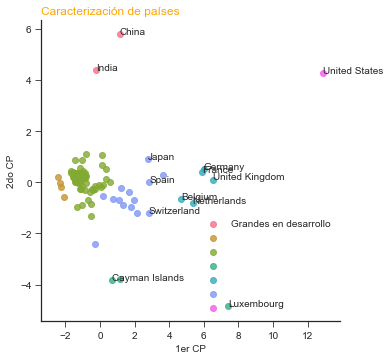

In [127]:
g = sns.lmplot( x="pc1", y="pc2", data= pc_df, fit_reg=False, hue='cluster', legend=False, size = 5)
for i, txt in enumerate(df_final.country.values):
    if txt in paises:
        plt.annotate(txt, (pc_df["pc1"][i],pc_df["pc2"][i]))
sns.set_style("ticks")
sns.set_palette("coolwarm")
plt.xlabel("1er CP")
plt.ylabel("2do CP")
plt.title("Caracterización de países", loc='left', fontsize=12, fontweight=0, color='orange')
carac = ["Grandes en desarrollo","","","","","","",""]
plt.legend(carac,loc = 4)
path = "C:\\Users\\Leonardo.Cordoba\\Downloads\\trabajo_integrador-20180320T180355Z-001\\trabajo_integrador\\grafos\\resultados\\graficos\\cluster\\scatter.png"
#plt.savefig(path)
plt.show()
plt.close()


Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.584747057487


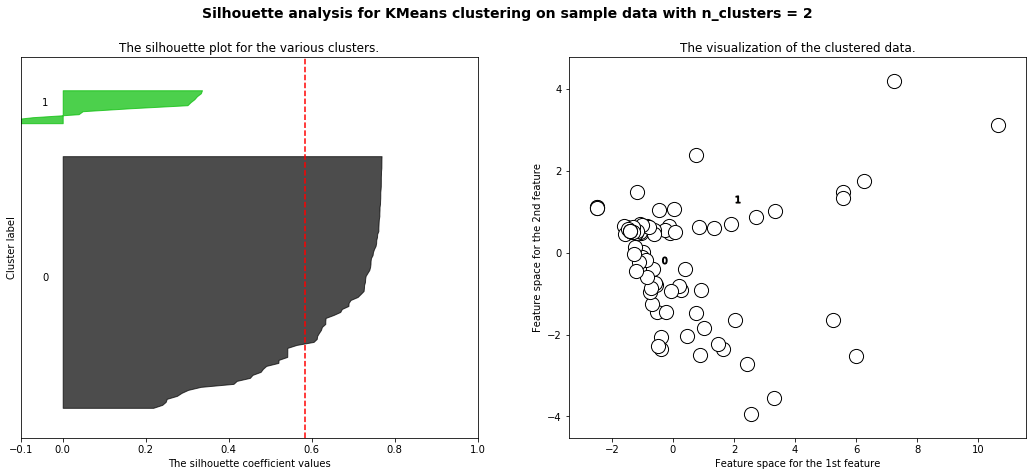

For n_clusters = 3 The average silhouette_score is : 0.397497936465


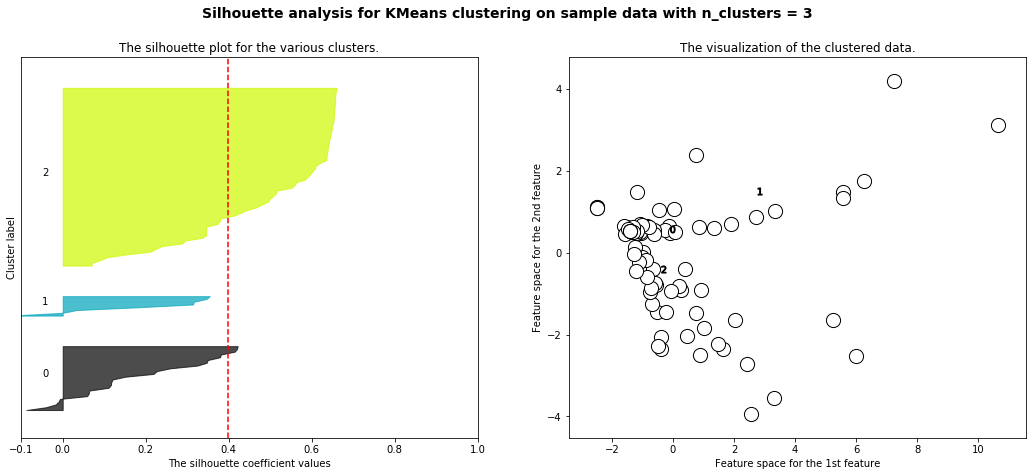

For n_clusters = 4 The average silhouette_score is : 0.438350593393


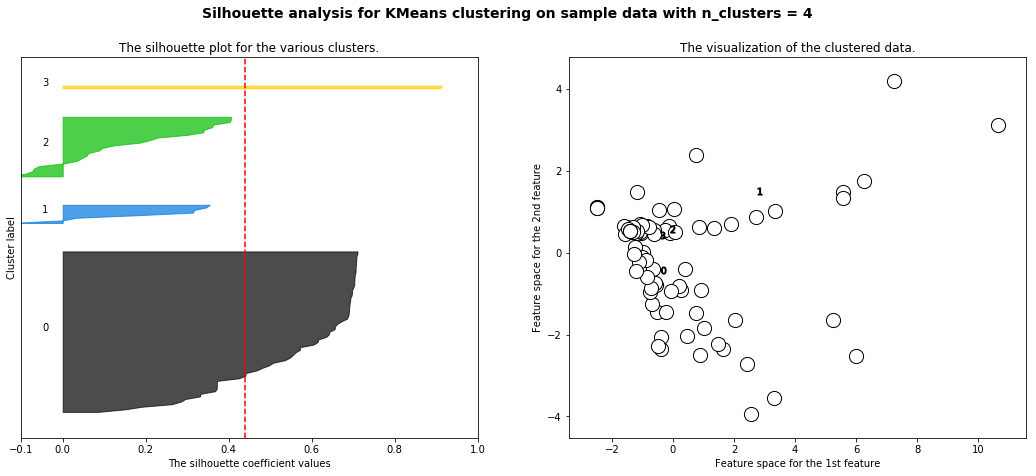

For n_clusters = 5 The average silhouette_score is : 0.391679474512


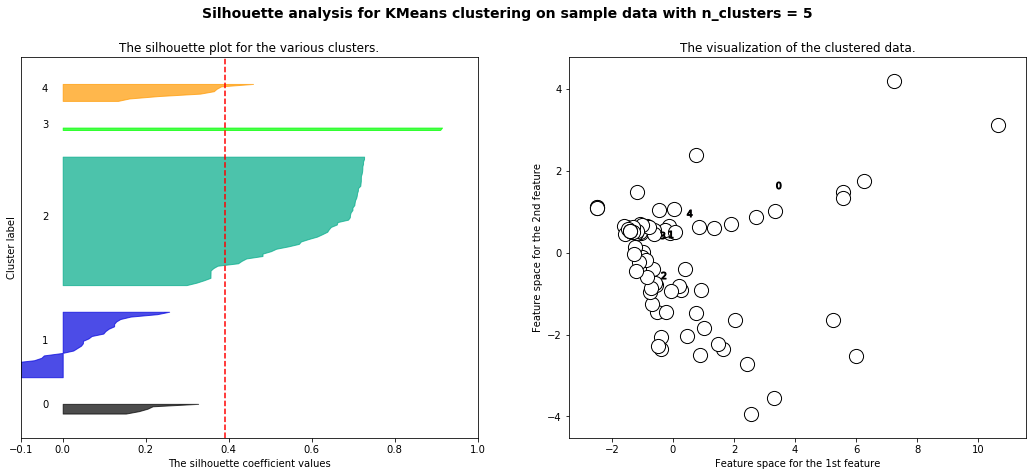

For n_clusters = 6 The average silhouette_score is : 0.444956108248


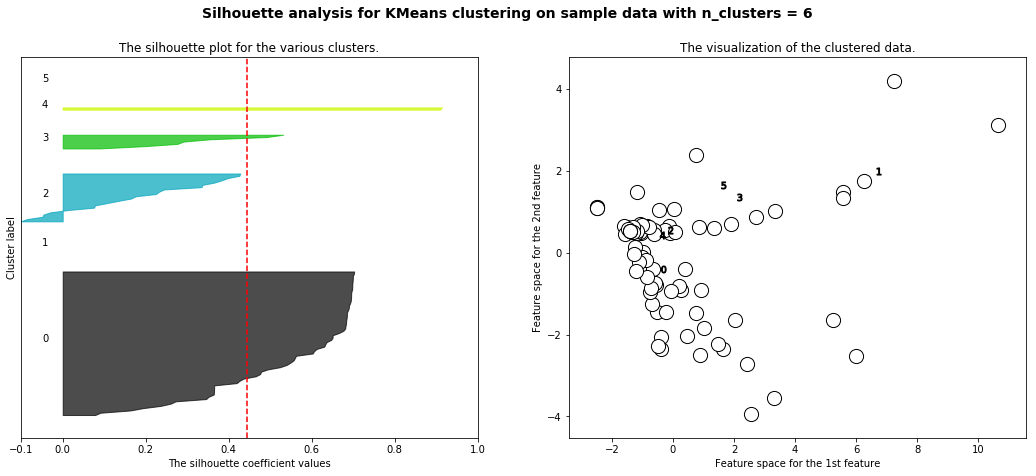

For n_clusters = 7 The average silhouette_score is : 0.492836755602


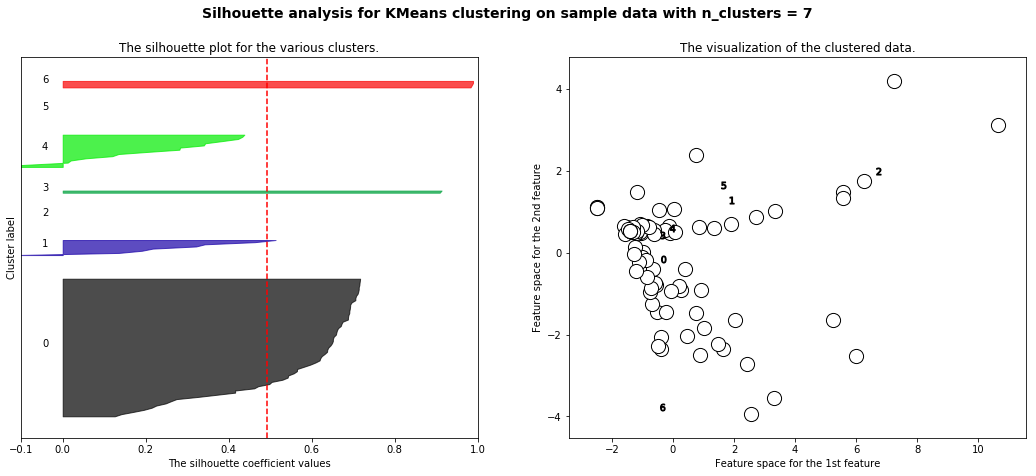

For n_clusters = 8 The average silhouette_score is : 0.447438017791


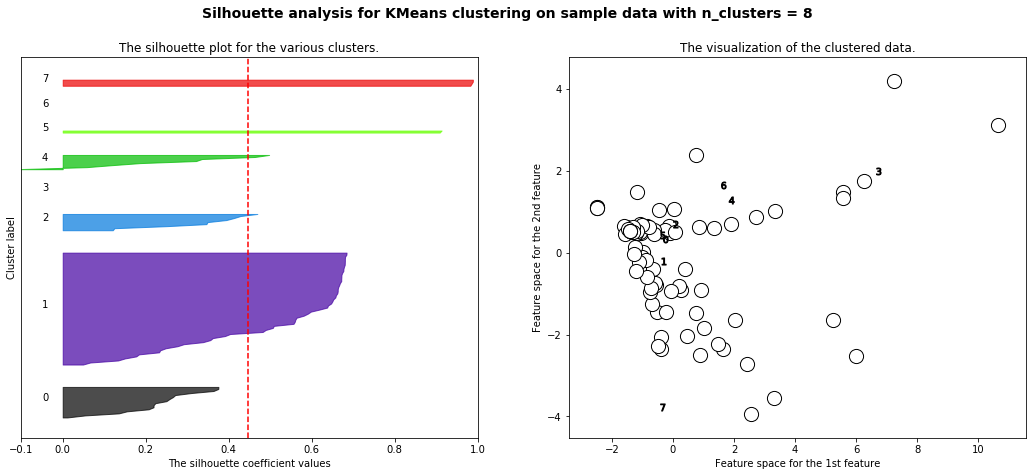

For n_clusters = 9 The average silhouette_score is : 0.468453558936


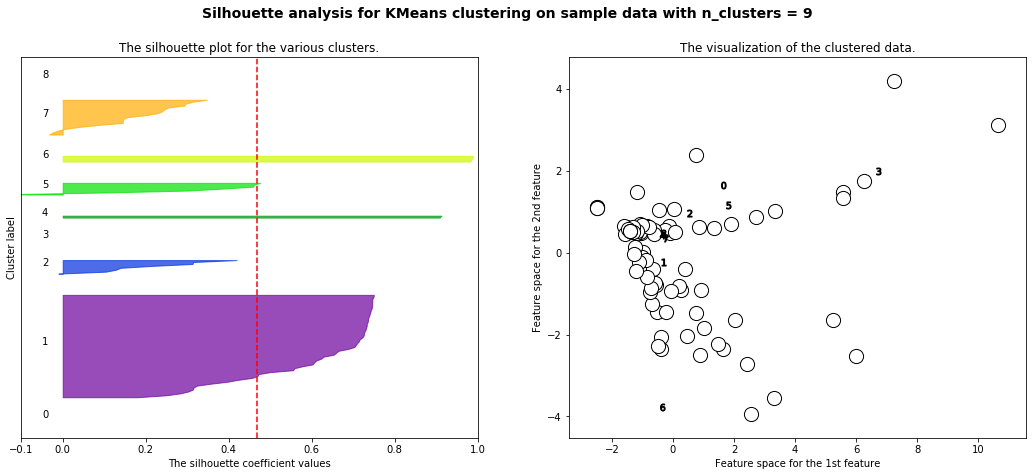

In [49]:
## Prueba con K/means
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, ]
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(pca_result[:,0], pca_result[:,1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(pca_result[:,0], pca_result[:,1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()